In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#peek at data
df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
115650   73954.0  1.199478 -1.107564 -0.016790 -2.173436 -1.137125 -0.628887   
256604  157771.0 -0.242991  0.640743  1.001654 -0.822653  0.845590 -0.211388   
47431    43210.0 -0.931375  0.322760 -0.566347 -0.480548  1.687959  3.933089   
152767   97460.0 -0.231748  0.515939  0.976578 -0.459099 -0.441197  0.151246   
41243    40603.0  1.341938 -0.555720  0.623925 -0.524730 -1.112776 -0.609307   

              V7        V8        V9  ...         V21       V22       V23  \
115650 -0.540171 -0.038288 -0.003981  ...   -0.131803  0.037962 -0.119604   
256604  0.957826 -0.250032 -0.105751  ...    0.431839  1.619711 -0.561585   
47431  -0.127386  1.284679 -0.238639  ...    0.011492  0.069802  0.207644   
152767 -0.483640  0.523989  1.752772  ...    0.000955  0.124621  0.222331   
41243  -0.625078 -0.058329 -0.778071  ...    0.046732  0.217218 -0.022784   

             V24       V25       V26       V27       V28  Amount  Class  
115650  0.050639  0.419117  0.126390  0.019525  0.014611    86.0      0  
256604 -0.304102  0.183392 -0.039676 -0.006204 -0.082861     1.0      0  
47431   1.069005 -0.131806  0.555943 -0.039851  0.024180   110.0      0  
152767  0.544799 -0.735784  0.345561 -0.134340 -0.054731    39.0      0  
41243   0.573499  0.514714 -0.275265  0.013597  0.005467     7.0      0  

[5 rows x 31 columns]

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

C:\Users\glaedur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


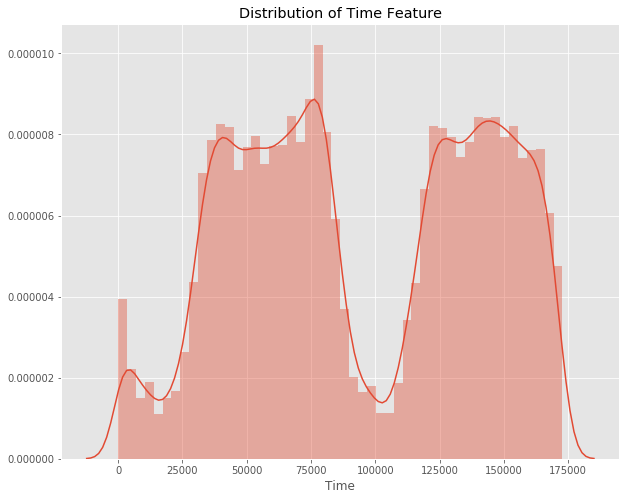

In [8]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time) #combination of hist and kdeplot

C:\Users\glaedur\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


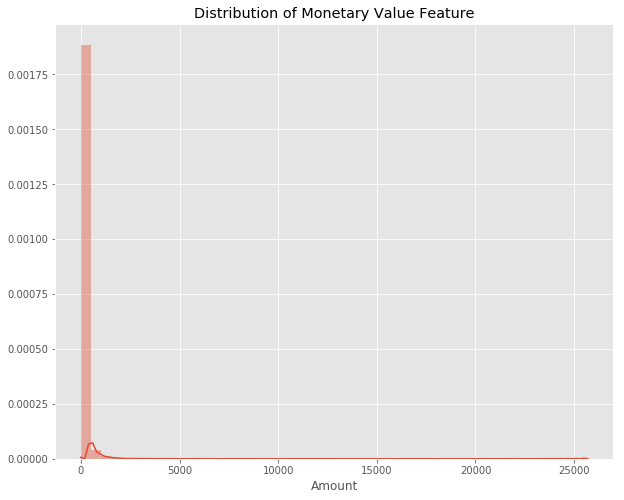

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [10]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5,0,'Class (0:Non-Fraudulent, 1:Fraudulent)')

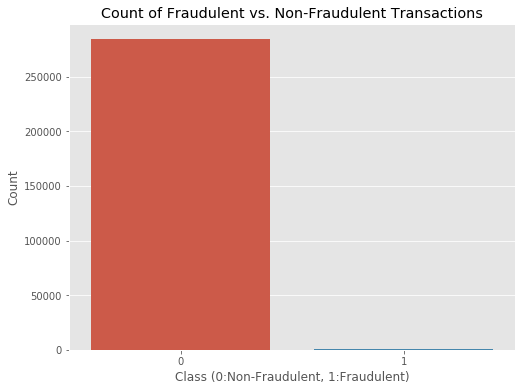

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [12]:
corr = df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.697e-17 -1.424e-15  1.755e-17  6.391e-17   
V2     -0.011  4.697e-17  1.000e+00  2.512e-16 -1.126e-16 -2.040e-16   
V3     -0.420 -1.424e-15  2.512e-16  1.000e+00 -3.417e-16 -1.437e-15   
V4     -0.105  1.755e-17 -1.126e-16 -3.417e-16  1.000e+00 -1.941e-15   
V5      0.173  6.391e-17 -2.040e-16 -1.437e-15 -1.941e-15  1.000e+00   
V6     -0.063  2.398e-16  5.025e-16  1.432e-15 -2.713e-16  7.926e-16   
V7      0.085  1.992e-15  3.966e-16  2.169e-15  1.556e-16 -4.210e-16   
V8     -0.037 -9.491e-17 -4.414e-17  3.433e-16  5.196e-16  7.589e-16   
V9     -0.009  2.170e-16 -5.729e-17 -4.234e-16  3.860e-16  4.205e-16   
V10     0.031  7.434e-17 -4.782e-16  6.289e-16  6.055e-16 -6.602e-16   
V11    -0.248  2.439e-16  9.469e-16 -5.502e-17 -2.084e-16  7.343e-16   
V12     0.124  2.422e-16 -6.588e-16  2.207e-16 -5.658e-16  3.761e-16   
V13    -0.066 -2.115e-16  3.855e-16 -6.883e-16 -1.506e-16 -9.579e-16   
V14    -0.099  9.353e-16 -2.541e-16  4.271e-16 -8.522e-17 -3.635e-16   
V15    -0.183 -3.252e-16  2.831e-16  1.123e-16 -1.508e-16 -5.133e-16   
V16     0.012  6.309e-16  4.934e-17  1.183e-15 -6.939e-16 -3.517e-16   
V17    -0.073 -5.012e-16 -9.883e-16  4.577e-17 -4.398e-16  1.426e-16   
V18     0.090  2.870e-16  2.637e-16  5.428e-16  1.494e-16  1.110e-15   
V19     0.029  1.818e-16  9.528e-17  2.577e-16 -2.657e-16 -3.138e-16   
V20    -0.051  1.037e-16 -9.310e-16 -9.429e-16 -3.223e-16  2.076e-16   
V21     0.045 -1.755e-16  8.444e-17 -2.972e-17 -9.977e-17 -1.369e-16   
V22     0.144  7.477e-17  2.501e-16  4.648e-16  2.100e-16  5.060e-16   
V23     0.051  9.809e-16  1.060e-16  2.115e-17  6.003e-17  1.638e-16   
V24    -0.016  7.354e-17 -8.142e-18 -9.352e-17  2.230e-16 -9.286e-16   
V25    -0.233 -9.805e-16 -4.262e-17  4.771e-16  5.395e-16  5.625e-16   
V26    -0.041 -8.622e-17  2.602e-16  6.522e-16 -6.180e-16  9.145e-16   
V27    -0.005  3.208e-17 -4.478e-16  6.240e-16 -6.403e-17  4.466e-16   
V28    -0.009  9.821e-16 -3.676e-16  7.727e-16 -5.864e-17 -3.299e-16   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9    ...            V21  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03    ...      4.474e-02   
V1      2.398e-16  1.992e-15 -9.491e-17  2.170e-16    ...     -1.755e-16   
V2      5.025e-16  3.966e-16 -4.414e-17 -5.729e-17    ...      8.444e-17   
V3      1.432e-15  2.169e-15  3.433e-16 -4.234e-16    ...     -2.972e-17   
V4     -2.713e-16  1.556e-16  5.196e-16  3.860e-16    ...     -9.977e-17   
V5      7.926e-16 -4.210e-16  7.589e-16  4.205e-16    ...     -1.369e-16   
V6      1.000e+00  1.429e-16 -1.707e-16  1.114e-16    ...     -1.576e-16   
V7      1.429e-16  1.000e+00 -8.692e-17  7.933e-16    ...      1.939e-16   
V8     -1.707e-16 -8.692e-17  1.000e+00  2.901e-16    ...     -2.412e-16   
V9      1.114e-16  7.933e-16  2.901e-16  1.000e+00    ...      4.578e-17   
V10     2.851e-16  3.043e-17  9.052e-17 -2.772e-16    ...      8.090e-16   
V11     4.866e-16 -1.084e-15  1.955e-16  4.682e-16    ...     -3.912e-16   
V12     2.141e-16  1.510e-15 -6.266e-17 -2.445e-15    ...      3.230e-16   
V13    -2.268e-16 -9.892e-17 -2.383e-16 -2.650e-16    ...      9.499e-17   
V14     3.453e-16 -1.729e-16 -1.131e-16  2.343e-16    ...      1.634e-17   
V15    -6.368e-18  1.937e-17  2.021e-16 -1.588e-15    ...      1.947e-17   
V16    -2.478e-16  2.894e-16  5.027e-16 -3.252e-16    ...     -3.927e-16   
V17     3.568e-16  1.150e-15 -3.509e-16  6.536e-16    ...     -7.754e-16   
V18     2.811e-16 -1.117e-16 -4.094e-16  1.204e-16    ...     -1.141e-15   
V19     2.717e-16 -2.874e-16 -5.340e-16  1.121e-16    ...      4.033e-16   
V20     1.899e-16  1.744e-16 -1.096e-16 -4.341e-16    ...     -1.121e-15   
V21    -1.576e-16  1.939e-16 -2.

Text(0.5,1,'Heatmap of Correlation')

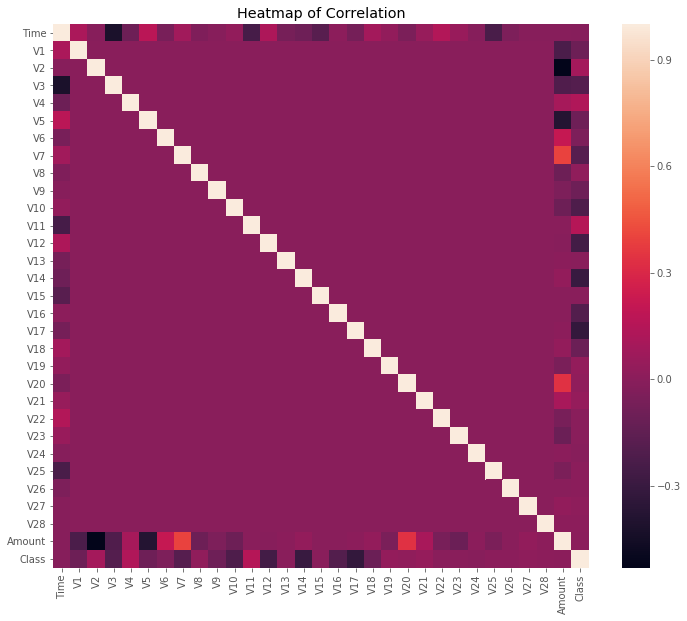

In [13]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [14]:
#skewness
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

**Scaling Amount and Time**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [16]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [17]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
36874    38717.0 -0.472 -0.195  1.460 -1.640 -0.213 -1.203  0.639 -0.395   
279148  168677.0  1.957 -0.231 -0.897  0.125 -0.275 -0.228 -0.659  0.213   
210461  137992.0  1.259 -1.489 -0.597  1.773 -0.792  0.613 -0.282  0.118   
172308  121046.0  1.925 -0.263 -1.325  0.416 -0.069 -0.354 -0.390  0.127   
66021    51845.0 -1.279  0.222  0.599 -3.739 -0.098 -1.438  0.279  0.484   

           V9     ...         V23    V24    V25    V26    V27    V28  Amount  \
36874  -1.197     ...      -0.119  0.375  0.069 -0.317 -0.111 -0.101   65.85   
279148  1.148     ...       0.419  0.546 -0.561 -0.330  0.014 -0.015    1.46   
210461  1.295     ...      -0.411 -0.330  0.203 -0.321  0.009  0.005  342.00   
172308  0.772     ...       0.224  0.598 -0.329  0.396 -0.054 -0.031   32.30   
66021   1.427     ...      -0.211 -0.019  0.315 -1.224  0.245  0.052    6.05   

        Class  scaled_amount  scaled_time  
36874       0         -0.090       -1.181  
279148      0         -0.347        1.555  
210461      0          1.014        0.909  
172308      0         -0.224        0.552  
66021       0         -0.329       -0.905  

[5 rows x 33 columns]

In [18]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [19]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256179, 31)
Test Shape: (28628, 31)


In [20]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [22]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 449 fraudulent transactions in the train data.


In [27]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [24]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
81664  -0.861  1.185  0.698 -1.425 -0.147 -0.671  0.190  0.404  0.064 -0.595   
223005 -1.155 -0.064  1.787 -2.525 -0.327  1.950 -0.830  0.766  0.926  0.901   
188019 -1.364 -1.461  0.882 -0.707 -0.762  0.175 -0.758  0.609 -0.584 -0.320   
194889 -0.706  0.125  1.141 -2.726 -0.612 -1.220  1.051 -0.823 -2.689  1.135   
144977  1.865  0.242 -0.183  4.029 -0.006  0.454 -0.308  0.173 -0.124  1.308   

           ...         V22    V23    V24    V25    V26    V27    V28  Class  \
81664      ...      -0.381 -0.081 -0.397 -0.042  0.779  0.162  0.056      0   
223005     ...       1.073 -0.144 -1.433 -0.397 -0.199  0.622  0.154      0   
188019     ...       0.559  0.561  0.453 -0.996 -0.370  0.149  0.044      0   
194889     ...      -0.442 -0.342  0.446  0.536 -0.285 -0.515 -0.174      0   
144977     ...       0.479  0.179  1.064  0.024  0.085 -0.011 -0.039      0   

        scaled_amount  scaled_time  
81664          -0.350       -0.666  
223005         -0.341        1.241  
188019          0.492        0.896  
194889         -0.034        0.964  
144977         -0.347        0.402  

[5 rows x 31 columns]

In [25]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [29]:
subsample = pd.concat([selected, fraud])
len(subsample)

898

In [32]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1     V2     V3     V4     V5     V6         V7     V8     V9    V10  \
0 -0.254  0.865 -0.037  0.650  0.164 -0.578  1.742e+00 -0.317 -0.297 -0.269   
1  1.203  0.729  0.357  2.489  0.111 -0.696  4.554e-01 -0.261 -1.036  0.688   
2 -2.356  1.746 -6.375  1.772 -3.439  1.458 -3.626e-01  1.444 -1.927 -6.565   
3 -2.021 -0.910  1.753 -0.585 -0.008 -0.754 -5.405e-01  0.626  0.473 -1.461   
4 -2.536  5.794 -7.618  6.396 -0.065 -3.136 -3.105e+00  1.823 -3.879 -7.298   
5 -6.616  3.563 -7.059  4.284 -5.096 -1.769 -4.938e+00  2.748 -3.797 -6.825   
6  2.096 -0.188 -1.513  0.054  0.366 -0.291  5.567e-04 -0.071  0.483  0.269   
7 -0.260  0.699  0.126 -1.246  2.597  3.401  3.238e-01  0.717 -0.374 -0.039   
8 -0.815  1.254  1.304  0.244 -0.374 -0.931  2.162e-01  0.325  0.838 -0.892   
9 -1.411  2.268 -2.298  1.871  0.249 -1.209 -1.359e+00  1.103 -1.317 -4.627   

      ...         V22    V23    V24    V25    V26    V27    V28  Class  \
0     ...       0.081  0.057 -0.082 -0.642 -0.796  0.150  0.186      0   
1     ...      -0.105 -0.065  0.408  0.633  0.003 -0.024  0.018      0   
2     ...       0.621  0.965 -0.619 -1.733  0.108  1.131  0.416      1   
3     ...      -0.460  0.021  0.109 -0.059  0.789 -0.104 -0.175      0   
4     ...      -0.448 -0.402 -0.289  1.012  0.426  0.413  0.308      1   
5     ...       0.041 -1.059  0.276  0.057 -0.266 -0.515  0.389      1   
6     ...      -0.854  0.205 -1.121 -0.212  0.248 -0.081 -0.083      0   
7     ...      -0.877 -0.097  0.983 -0.063  0.058  0.104 -0.109      0   
8     ...      -0.863  0.085  0.276 -0.214  0.037  0.105  0.041      0   
9     ...      -0.615 -0.196 -0.464  0.118 -0.485  0.374  0.188      1   

   scaled_amount  scaled_time  
0          0.222        0.861  
1         -0.317       -0.357  
2          2.557        0.929  
3         -0.033       -0.443  
4         -0.349       -1.809  
5          0.665       -0.379  
6         -0.349        1.094  
7         -0.341       -0.508  
8         -0.285       -1.883  
9         -0.349       -0.371  

[10 rows x 31 columns]

Text(0.5,0,'Class (0:Non-Fraudulent, 1:Fraudulent)')

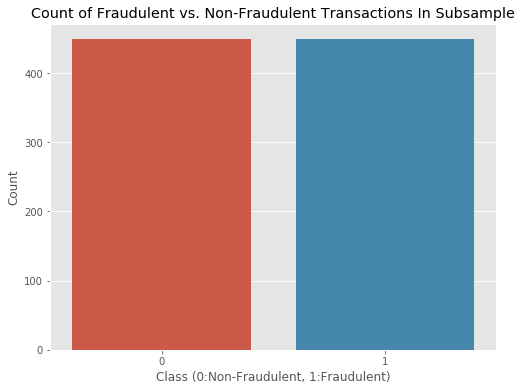

In [33]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [35]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.410
V2             0.450
V3            -0.567
V4             0.694
V5            -0.369
V6            -0.345
V7            -0.467
V8             0.051
V9            -0.562
V10           -0.621
V11            0.688
V12           -0.674
V13           -0.102
V14           -0.754
V15           -0.014
V16           -0.599
V17           -0.555
V18           -0.452
V19            0.271
V20            0.177
V21            0.128
V22            0.010
V23           -0.005
V24           -0.083
V25            0.021
V26            0.029
V27            0.070
V28            0.063
Class          1.000
scaled_amount  0.096
scaled_time   -0.127

In [36]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.567
V9  -0.562
V10 -0.621
V12 -0.674
V14 -0.754
V16 -0.599
V17 -0.555

In [37]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.694
V11    0.688
Class  1.000

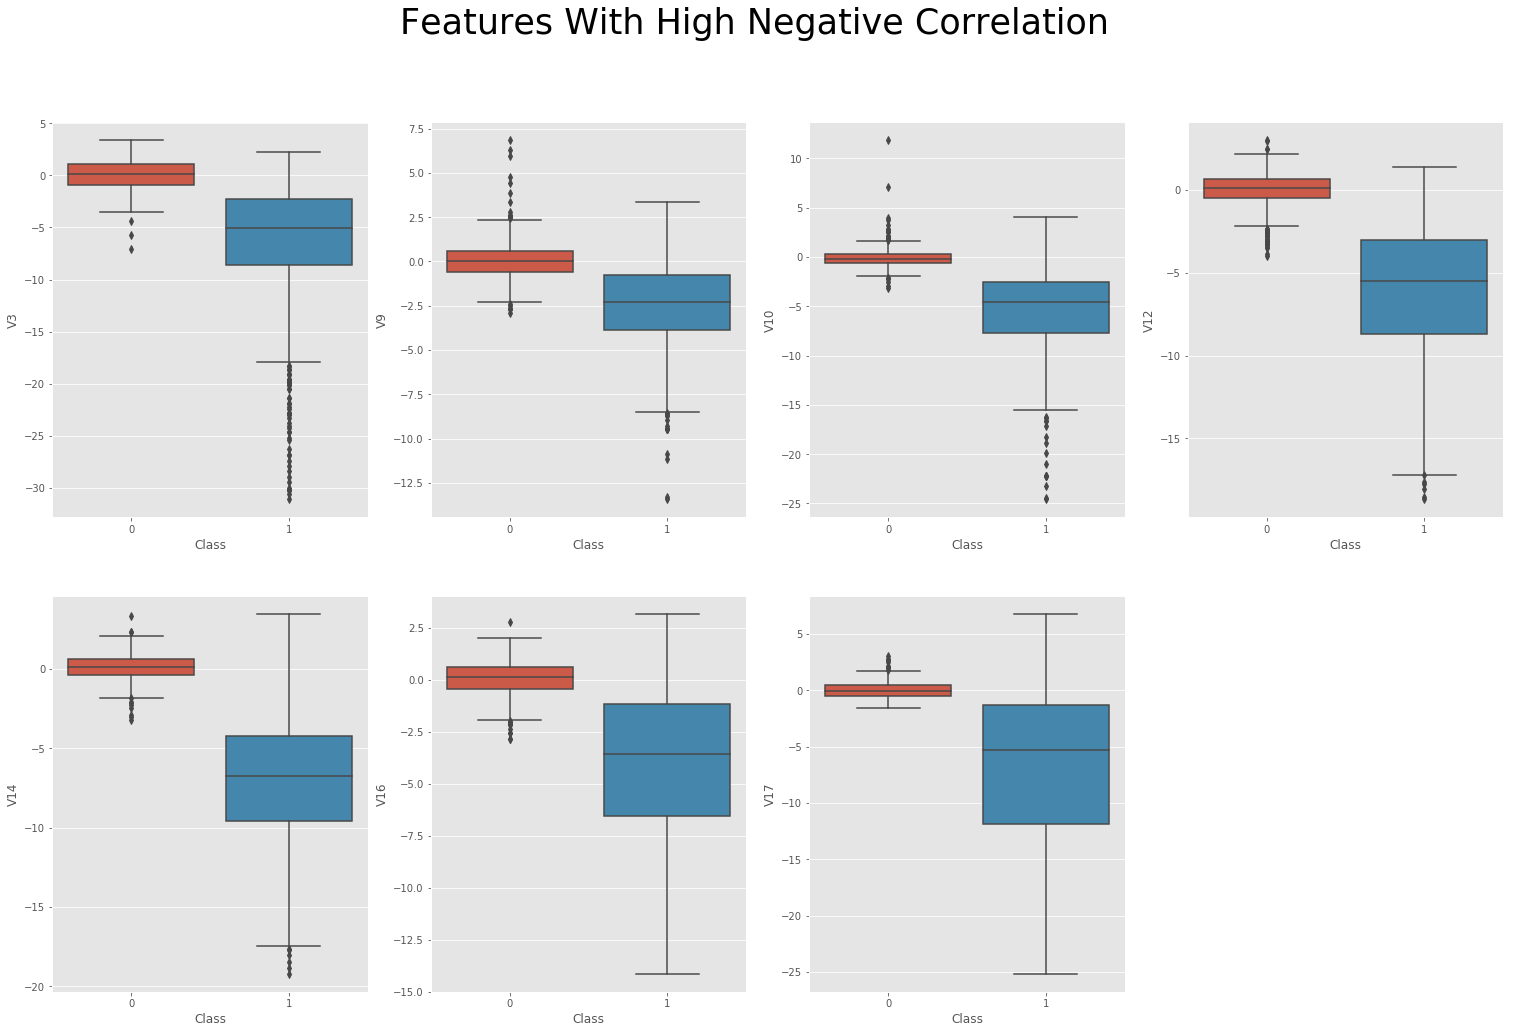

In [38]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

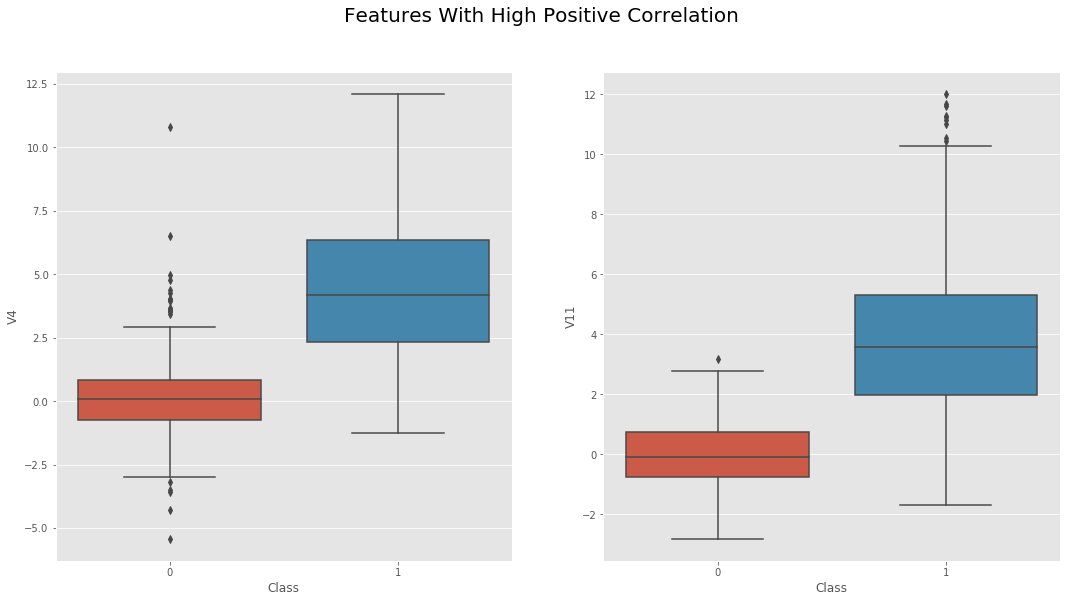

In [39]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [40]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [41]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 898 transactions by 265 transactions to 633 transactions.


**Dimensionality Reduction**

In [42]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [43]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

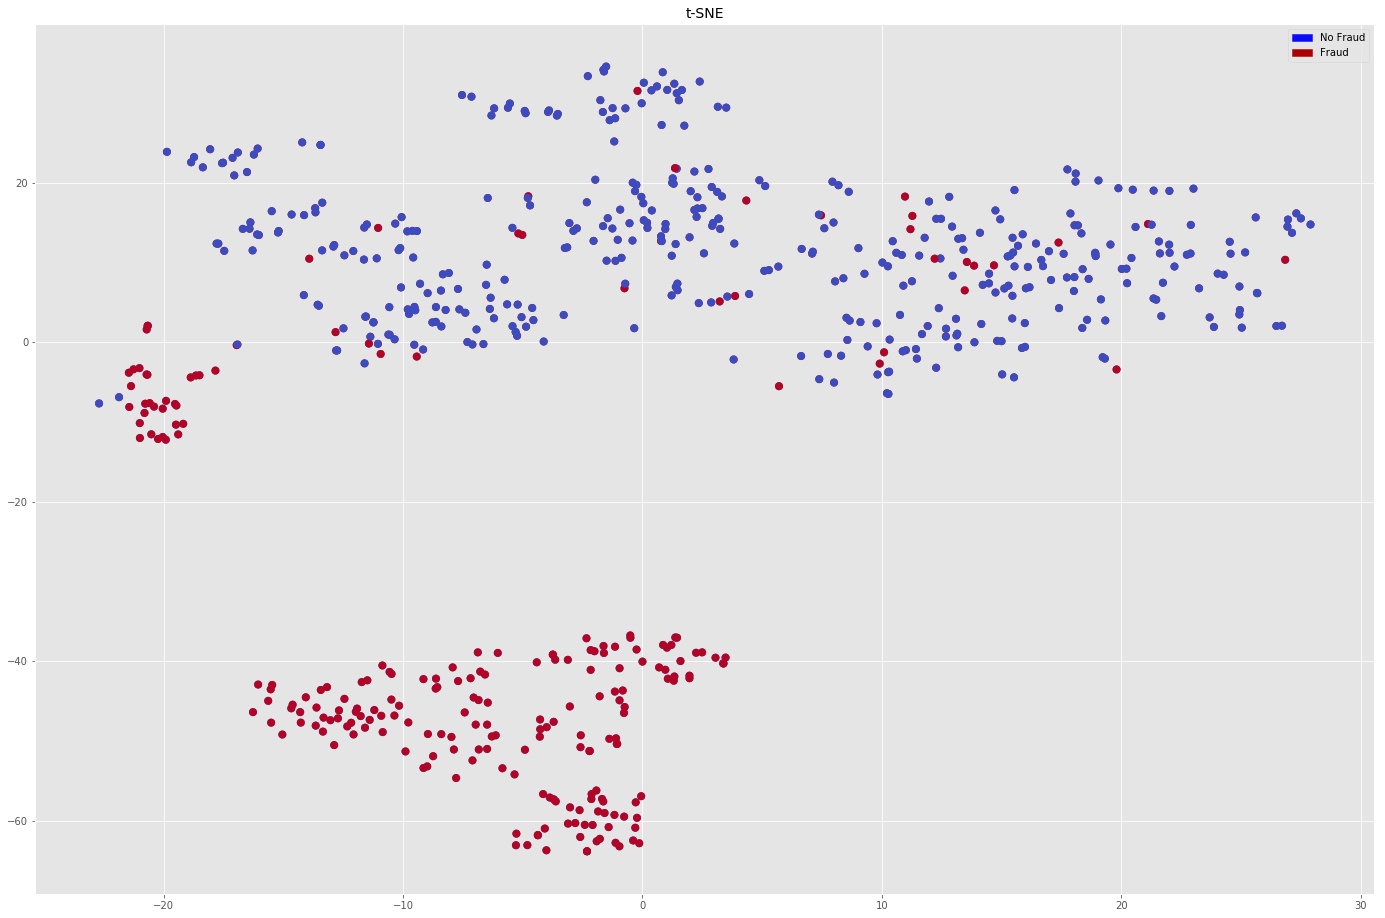

In [45]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])
plt.savefig('t_SNE_scatter.png')

**Classification Algorithms**

In [285]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [269]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [270]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [271]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (500, 30) (125, 30) 

Y_shapes:
 Y_train: Y_validation:
 (500,) (125,)


In [289]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [298]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.969945 (0.022522)
LDA: 0.966647 (0.027772)
KNN: 0.952231 (0.023558)
CART: 0.899554 (0.039180)
SVM: 0.959068 (0.016867)
XGB: 0.972192 (0.013984)
RF: 0.966171 (0.022672)


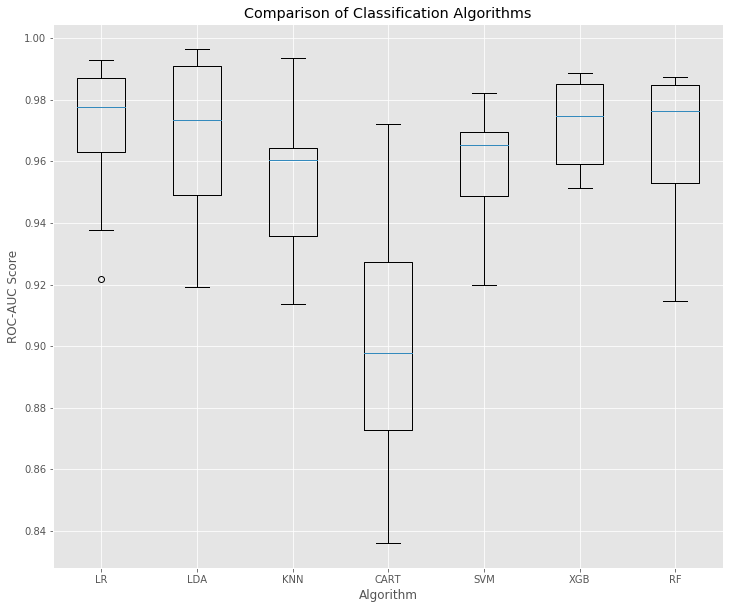

In [299]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [297]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')